In [152]:
import talib
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [153]:
import random
random.seed(42)

In [154]:
data = pd.read_csv("RELIANCE.NS.csv")
data = data.dropna()
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,1996-01-01,16.009800,16.095699,15.904300,16.068300,2.426239,47600787.0
1,1996-01-02,16.029301,16.107401,15.826200,15.943400,2.407380,77143764.0
2,1996-01-03,16.205000,16.943001,16.029301,16.064400,2.425650,95695836.0
3,1996-01-04,15.912100,15.962900,15.701300,15.916000,2.403243,99159504.0
4,1996-01-05,15.853600,15.853600,15.670000,15.806700,2.386739,76213503.0
5,1996-01-08,15.775500,15.787200,15.017900,15.174100,2.291219,85478335.0
6,1996-01-09,14.725100,14.994500,14.233100,14.736800,2.225189,177730990.0
7,1996-01-10,14.447800,14.795400,14.291600,14.358000,2.167992,126455257.0
8,1996-01-11,14.213500,14.877400,14.194000,14.807100,2.235804,187276245.0
9,1996-01-12,14.916400,15.029600,14.553300,14.650900,2.212218,171294714.0


In [155]:
data = data[["Open", "High", "Low", "Close"]]

In [156]:
data["H-L"] = data["High"] - data["Low"]
data["O-C"] = data["Close"] - data["Open"]
data["3days MA"] = data['Close'].shift(1).rolling(window = 3).mean() # 3 days moving average
data["10days MA"] = data['Close'].shift(1).rolling(window = 10).mean()
data["30days MA"] = data['Close'].shift(1).rolling(window = 30).mean()
data["std_dev"] = data["Close"].rolling(5).std() #standard deviation
data["RSI"] = talib.RSI(data['Close'].values, timeperiod = 9) #Relative Strength Index
data['Williams %R'] = talib.WILLR(data['High'].values, data['Low'].values, data['Close'].values, 7)

In [157]:
data

,Open,High,Low,Close,H-L,O-C,3days MA,10days MA,30days MA,std_dev,RSI,Williams %R
0,16.009800,16.095699,15.904300,16.068300,0.191399,0.058500,NaN,NaN,NaN,NaN,NaN,NaN
1,16.029301,16.107401,15.826200,15.943400,0.281201,-0.085901,NaN,NaN,NaN,NaN,NaN,NaN
2,16.205000,16.943001,16.029301,16.064400,0.913700,-0.140600,NaN,NaN,NaN,NaN,NaN,NaN
3,15.912100,15.962900,15.701300,15.916000,0.261600,0.003900,16.025367,NaN,NaN,NaN,NaN,NaN
4,15.853600,15.853600,15.670000,15.806700,0.183600,-0.046900,15.974600,NaN,NaN,0.109932,NaN,NaN
5,15.775500,15.787200,15.017900,15.174100,0.769300,-0.601400,15.929033,NaN,NaN,0.351391,NaN,NaN
6,14.725100,14.994500,14.233100,14.736800,0.761400,0.011700,15.632267,NaN,NaN,0.562697,NaN,-81.412605
7,14.447800,14.795400,14.291600,14.358000,0.503800,-0.089800,15.239200,NaN,NaN,0.671736,NaN,-95.390976
8,14.213500,14.877400,14.194000,14.807100,0.683400,0.593600,14.756300,NaN,NaN,0.547031,NaN,-77.697353
9,14.916400,15.029600,14.553300,14.650900,0.476300,-0.265500,14.633967,NaN,NaN,0.294395,22.290429,-74.170388


In [158]:
data['Price_Rise'] = np.where(data['Close'].shift(-1) > data['Close'], 1, 0)

In [159]:
data = data.dropna()

In [160]:
X = data.iloc[:, 4:-1]
y = data.iloc[:, -1]

In [161]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [162]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [163]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

clf = Sequential()

clf.add(Dense(units=512, kernel_initializer="uniform", activation="relu", input_dim=X.shape[1]))
clf.add(Dense(units=512, kernel_initializer="uniform", activation="relu"))
clf.add(Dense(units=512, kernel_initializer="uniform", activation="relu"))
clf.add(Dense(units=512, kernel_initializer="uniform", activation="relu"))

clf.add(Dense(units=1, kernel_initializer="uniform", activation="sigmoid"))

clf.compile(optimizer="adam", loss="mean_squared_error", metrics=["accuracy"])
clf.fit(X_train, y_train, batch_size=100, epochs=1000)

Epoch 1/1000
4642/4642 [==============================] - 2s 358us/step - loss: 0.2501 - acc: 0.5112
Epoch 2/1000
4642/4642 [==============================] - 0s 87us/step - loss: 0.2498 - acc: 0.5200
Epoch 3/1000
4642/4642 [==============================] - 0s 88us/step - loss: 0.2499 - acc: 0.5108
Epoch 4/1000
4642/4642 [==============================] - 0s 92us/step - loss: 0.2496 - acc: 0.5207
Epoch 5/1000
4642/4642 [==============================] - 0s 91us/step - loss: 0.2496 - acc: 0.5248
Epoch 6/1000
2000/4642 [===========>..................] - ETA: 0s - loss: 0.2495 - acc: 0.5260

KeyboardInterrupt: 

In [164]:
y_pred = clf.predict(X_test)
y_pred = (y_pred > 0.5)

In [165]:
data["y_pred"] = np.NaN
data.iloc[(len(data) - len(y_pred)):, -1:] = y_pred
trade_data = data.dropna()

In [166]:
trade_data["Tomorrows returns"] = 0.
trade_data['Tomorrows returns'] = np.log(trade_data["Close"]/trade_data["Close"].shift(1))
trade_data["Tomorrows returns"] = trade_data["Tomorrows returns"].shift(-1)

In [167]:
trade_data["Strategy returns"] = 0.
trade_data["Strategy returns"] = np.where(trade_data["y_pred"] == True, trade_data["Tomorrows returns"], - trade_data["Tomorrows returns"])

In [168]:
trade_data["Cumulative market returns"] = np.cumsum(trade_data["Tomorrows returns"])
trade_data["Cumulative strategy returns"] = np.cumsum(trade_data["Strategy returns"])

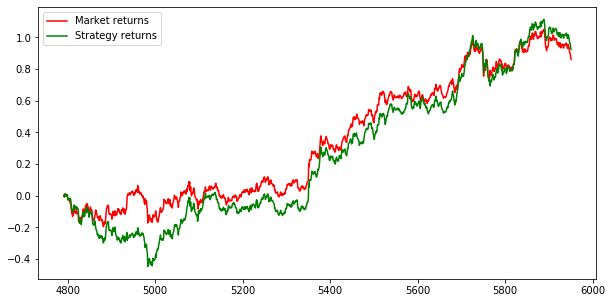

In [169]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

plt.plot(trade_data["Cumulative market returns"], color='r', label='Market returns')
plt.plot(trade_data["Cumulative strategy returns"], color='g', label='Strategy returns')
plt.legend()

plt.show()